## MEF04. Código de elementos finitos: Barra 1D elemento linear


![title](porticoex0.png)

Começamos então definindo o número de nós (n_nos) e número de elementos (n_el) da estrutura, assim como o número de cada nós e suas coordenadas no eixo x:

In [37]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

#Dados do problema "Pórticos: EXEMPLO 02" da lista
n_nos=3 #Número de nós
n_el=2 #Número de elementos
# número de cada nó e coordenadas x e y dos mesmos
no = [0,     1,      2]
x  = [0,     1.5,    3]

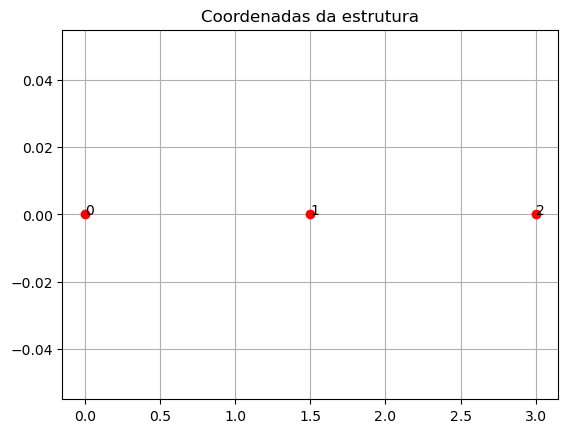

In [38]:
###############     Código apenas para geração da imagem    ##################
from IPython.display import display, Math, HTML
y = [0, 0, 0]
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

#Código apenas para geração da imagem
fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i]), xy=(x[i], y[i]), xytext=(x[i], y[i]))

title('Coordenadas da estrutura')
grid()

show()

O próximo passo é a definição da matriz de conectividade da estrutura [conec], responsável pela definição dos elementos e suas propriedades. Essa matriz possui uma linha para cada elemento, sendo que cada coluna indica, respectivamente: número do elemento, número da seção transversal do mesmo (que define suas propriedades), primeiro nó e segundo nó do elemento. 

As propriedades são definidas na matriz [secoes], que possui uma linha para cada seção distinta na estrutura. A primeira coluna indica o número da seção, a segunda a área da seção transversal, e a terceira o módulo de elasticidade. Vale ressaltar que essas propriedades são necessárias para treliças planas.

In [39]:
# Matriz de conectividade: [elemento, Número da seção, primeiro nó, segundo nó]
conec = np.array([[0,   0,   0,   1],
                  [1,   0,   1,   2]])

n_sec=1 # Número de seções distintas presentes na estrutura

# Matriz de Seções: [número da seção, área, módulo de elasticidade]
secoes = np.array([[0, 50e-6, 200e9],
                   [1, 8000e-6, 200e9]])

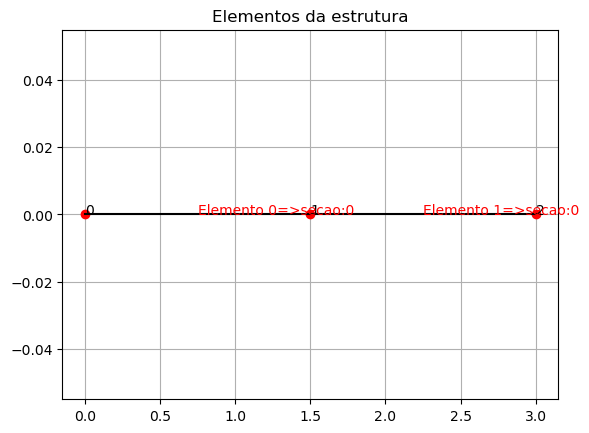

In [40]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

#Apenas para plotagem da figura
fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i]), xy=(x[i], y[i]), xytext=(x[i], y[i]))

for i in range(n_el):
    plt.plot([x[conec[i,2]], x[conec[i,3]]],[y[conec[i,2]], y[conec[i,3]]],'k')
    plt.annotate('Elemento ' +str(i)+'=>secao:'+str(conec[i,1]), xy=((x[conec[i,2]]+x[conec[i,3]])/2, (y[conec[i,2]]+y[conec[i,3]])/2),
                 xytext=((x[conec[i,2]]+x[conec[i,3]])/2, (y[conec[i,2]]+y[conec[i,3]])/2),color='r')
title('Elementos da estrutura')
grid()

show()

O próximo passo é definir o carregamento. A seguir tem-se o caso das forças nodais, onde a matriz  [forcas]  é utilizada para definir as informações necessárias. Para cada nó em que ao menos uma força nodal atua, tem-se uma linha nessa matriz. A primeira coluna refere-se ao nó carregado, a segunda ao carregamento na direção x.

In [41]:
# Carregamentos nodais (Fzão da estrutura)
n_forcas=1 #Número de nós na qual atuam forças
#Matriz de forças [nó (primeiro nó é o nó zero e não 1), força em x, força em y]
forcas=np.matrix([2,   5e3])
print(forcas)

[[2.e+00 5.e+03]]


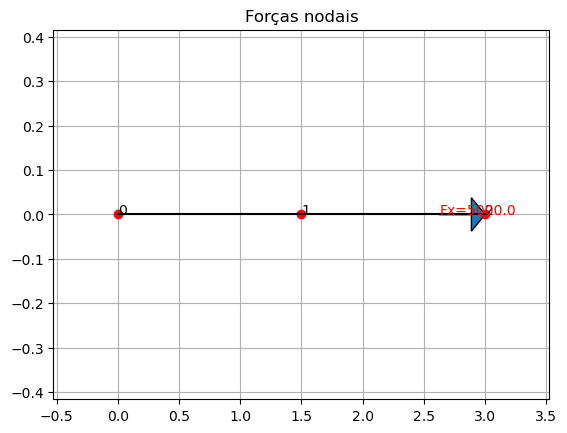

In [42]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

from pylab import *

#Apenas para plotagem da figura
fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i-1]), xy=(x[i-1], 0), xytext=(x[i-1], y[i-1]))
l = max(abs(x[1]-x[0]),abs(0))
j = 0
if n_forcas != 0:
    for i in forcas[:,0]:
        if int(forcas[j,1]) != 0:
            arrow( x[int(i)]-np.sign(forcas[j,1])*0.25*l, y[int(i)],np.sign(forcas[j,1])*0.25*l,0,
                  length_includes_head = True, head_width = l*0.05 )
            plt.annotate('Fx='+str(forcas[j,1]), xy=(x[int(i)]-np.sign(forcas[j,1])*0.25*l, y[int(i)]),
                     xytext=(x[int(i)]-np.sign(forcas[j,1])*0.25*l, y[int(i)]),color='r')
        #if int(forcas[j,2]) != 0:
         ##        length_includes_head = True, head_width = l*0.05 )
           # plt.annotate('Fy='+str(forcas[j,2]), xy=(x[int(i)], y[int(i)]-np.sign(forcas[j,2])*0.25*l),
            #         xytext=(x[int(i)], y[int(i)]-np.sign(forcas[j,2])*0.25*l),color='r')


        j = j+1

for i in range(n_el):
    plt.plot([x[conec[i,2]], x[conec[i,3]]],[y[conec[i,2]], y[conec[i,3]]],'k')    

left, right = xlim()
lower, upper = ylim()
xlim((left-0.25*l,right+0.25*l))
ylim((lower-0.25*l,upper+0.25*l))
title(u"Forças nodais")
grid()

show()

In [44]:
# Carregamentos equivalentes (Feq da estrutura)
n_eq=2 # número de elementos que contem carregamentos equivalentes
# Matriz de carregamento equivalente = [elemento, tipo de carregamento, intensidade, posição (para o caso de carregamento concentrado entre nós)]
w_eq=np.array([[ 0, 1, 10e3],
               [1, 1, 10e3]])

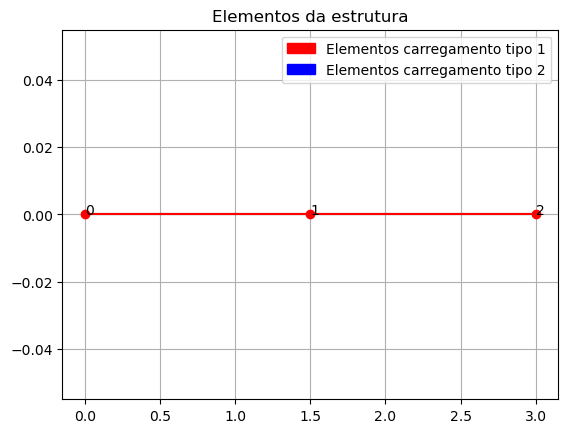

In [45]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

#Apenas para plotagem da figura
import matplotlib.patches as mpatches

fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i-1]), xy=(x[i-1], 0), xytext=(x[i-1], 0))
for i in range(n_el):
    plt.plot([x[conec[i,2]], x[conec[i,3]]],[0, 0],'k')
    
if n_eq != 0:
    j = 0
    for i in w_eq[:,0]:
        if w_eq[j,1]==1:
            fig1 = plt.plot([x[conec[int(i),2]], x[conec[int(i),3]]],[0,0],'r')
        #elif w_eq[j,1]==2:
        #    fig2 = plt.plot([x[conec[int(i),2]], x[conec[int(i),3]]],[y[conec[int(i),2]], y[conec[int(i),3]]],'b')
        j = j + 1

red_patch = mpatches.Patch(color='red', label=u'Elementos carregamento tipo 1')
blue_patch = mpatches.Patch(color='blue', label=u'Elementos carregamento tipo 2')
plt.legend(handles=[red_patch,blue_patch])


    
title(u'Elementos da estrutura')
grid()

show()

Por fim, resta definir as condições de contorno do problema. Para isso, a matriz  [GDL_rest]   com número de linhas igual ao número de nós que contém pelo menos uma restrição (tipo de apoio) deve ser informada. Já para as colunas, a primeira indica o número do nó restringido e a segunda refere-se aos grau de liberdade em x desse nó. Caso apresente valor 1, isso indica que o respectivo GDL desse nó está restringido, caso seja zero, o GDL está liberado. Vale ressaltar que caso um nó não apresente restrições, ele não deve ser incluído na matriz.

In [46]:
# Apoios
n_rest=1  #número de nós restringidos
#Matriz de condições de contorno 
# [número do nó, restringido_x, restringido_y] (1 para restringido, e 0 para livre)
GDL_rest=np.array([[0, 1 ]])  


Essa matriz de condições de contorno indica que os seguintes nós e graus de liberdade estão restringidos: 

In [47]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align}'
j = 0
for i in GDL_rest[:,0]:
    txt = txt + 'No' + str(GDL_rest[j,0]) + ':'
    if GDL_rest[j,1] == 1:
        txt = txt+' x=fixo,'
    txt = txt+'\\\\'
    j = j + 1
txt = txt + '\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

# Cálculo da estrutura

Todas as informações necessárias para definição da estrutura já foram passadas. Assim, as próximas linhas de código são independentes do problema em questão.

O cálculo da estrutura inicia pela matriz de rigidez da mesma, considerando a contribuição de um elemento por vez, conforme trecho de código a seguir:

In [48]:
# CALCULO DA ESTRUTURA
GDL=n_nos  #graus de liberdade da estrutura
K=np.zeros((GDL,GDL)) #matriz rigidez global

# Cálculo da matriz de cada elemento
for el in range(n_el):
    #calculo do comprimento do elemento el
    no1=conec[el,2]
    no2=conec[el,3]
    L = np.sqrt((x[no2] - x[no1])**2)
    #Propriedades
    A = secoes[conec[el,1],1]
    E = secoes[conec[el,1],2]
    # Matriz de transformação do elemento "el"
    k=E*A/L
    ke=np.array([[k,  -k],
                [-k,   k]])
    kg=ke #np.dot(np.transpose(T),np.dot(ke,T))  
    #Determinando matriz de incidência cinemática:
    b = np.zeros((2,GDL))
    i=no1
    j=no2
    b[0,i] = 1
    b[1,i+1] = 1
    
    #Expandindo e convertendo a matriz do elemento para coordenadas globais:
    Ki=np.dot(np.transpose(b),np.dot(kg,b))
    #Somando contribuição do elemento para a matriz de rigidez global:
    K = K + Ki

A matriz de rigidez da estrutura $(\textbf{K})$ é então:

In [49]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align}\begin{bmatrix}'
for j in range(GDL):
    for i in range(GDL-1):
        txt+=str(np.round(K[j,i],2))+'&'
    
    txt+= str(np.round(K[j,GDL-1],2)) + '\\\\'
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

A seguir tem-se o cálculo do vetor de forças:

In [50]:
# Vetor de forcas Global
F=np.zeros((GDL,1))
for i in range(n_forcas):
    F[int(forcas[i,0])]=forcas[i,1]


In [51]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align}\quad\boldsymbol F=\begin{bmatrix}'
for j in range(GDL):    
    txt+= str(np.round(F[j,0],2)) + '\\\\'
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

In [53]:
# Construção do vetor de foras equivalentes
Feq=np.zeros((GDL,1))
for i in range(n_eq):
    tipo=int(w_eq[i,1])   #tipo de força equivalente
    el=int(w_eq[i,0])     #elemento onde está aplicada
    if tipo==1: #Carregamento distribuído
        f=np.zeros((6,1))
        no1=conec[el,2]
        no2=conec[el,3]
        L = np.sqrt((x[no2] - x[no1])**2)
        w=w_eq[i,2]
        qi=x[no1]*w
        qj=x[no2]*w
        f[0]=2*qi+qj
        f[1]=qi+2*qj
        #feqTT=np.dot(np.transpose(T),f)
        feq=L/6*f
        Feq[no1]=Feq[no1]+feq[0]
        Feq[no1+1]=Feq[no1+1]+feq[1]
        
print(Feq)

[[ 3750.]
 [22500.]
 [18750.]]


Tem-se calculados até aqui a matriz de rigidez $(\textbf{K})$, o vetor de forças nodais $(\textbf{F})$ e o vetor de forças equivalentes $(\textbf{F}_{eq})$. O próximo passo é aplicar as condições de contorno ao problema, de modo a possibilitar a obtenção de uma solução para o mesmo. Para isso, elimina-se as linhas de $\textbf{K}$, $\textbf{F}$ e $\textbf{F}_{eq}$ e colunas de $\textbf{K}$ referentes aos GDL restringidos. 

Uma maneira computacionalmente simples e eficiente de se fazer isso é zerar os termos das linhas e colunas que seriam eliminadas de $\textbf{K}$, $\textbf{F}$ e $\textbf{F}_{eq}$ e atribuir o valor 1 aos termos da diagonal da matriz $\textbf{K}$ que seriam eliminados. O trecho de código a seguir refere-se a esse passo:

In [58]:
# guardamos os originais de K e F
Kg=np.copy(K)
#Kg[:] = K[:]

Fg=F+Feq
# Aplicar Restrições (condições de contorno)
for k in range(n_rest):
    # Verifica se há restrição na direção x
    if GDL_rest[k,1]==1:
        j=GDL_rest[k,0]
        #Modificar Matriz de Rigidez
        for i in range(GDL):
            Kg[j,i]=0   #zera linha
            Kg[i,j]=0   #zera coluna
        Kg[j,j]=1       #valor unitário na diagonal principal
        Fg[j]=0


Para ilustrar esse processo, a matriz de rigidez restringida da estrutura resulta em:

In [59]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align}\begin{bmatrix}'
for j in range(GDL):
    for i in range(GDL-1):
        txt+=str(np.round(Kg[j,i],2))+'&'
    
    txt+= str(np.round(Kg[j,GDL-1],2)) + '\\\\'
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

Após a aplicação das condições de contorno, pode-se obter os deslocamentos nos nós da estrutura resolvendo o sistema de equações lineares $\textbf{K}\textbf{d}=\textbf{F}+\textbf{F}_{eq}$:

In [60]:
# Calculo dos GDLs
desloc=np.linalg.solve(Kg,Fg)    

In [61]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)
from decimal import Decimal

txt = r'\begin{align}\quad\boldsymbol d=\begin{bmatrix}'
for j in range(GDL):
    if desloc[j,0] == 0:
        txt+= str(desloc[j,0]) + '\\\\'
    else:    
        txt+= str("{:.2E}".format(Decimal(desloc[j,0]))) + '\\\\'
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

Tendo calculado os deslocamentos, pode-se agora obter as reações $(\textbf{R})$ usando a expressão $\textbf{R} = \textbf{K}\textbf{d}$:

In [25]:
# Reações
reacoes=np.matmul(K, desloc)

In [26]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)
from decimal import Decimal

txt = r'\begin{align}\quad\boldsymbol R=\begin{bmatrix}'
for j in range(GDL):
    if reacoes[j,0] == 0:
        txt+= str(reacoes[j,0]) + '\\\\'
    else:    
        txt+= str("{:.2E}".format(Decimal(reacoes[j,0]))) + '\\\\'
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

In [64]:
# Esforços nos elementos
f_el=np.zeros((n_el,2))
N = np.zeros((n_el,1))
Smax = np.zeros((n_el,1))
Falha = np.zeros((n_el,1))
Sadm=190e6 #colocar valor do pdf do projeto 
peso=0
ro=7861
for el in range(n_el):
    #calculo do comprimento do elemento el
    no1=conec[el,2]
    no2=conec[el,3]
    L = np.sqrt((x[no2] - x[no1])**2)
    #Propriedades
    A = secoes[conec[el,1],1]
    E = secoes[conec[el,1],2]
    #Cossenos diretores a partir das coordenadas dos ns do elemento
    c = (x[no2] - x[no1])/L	# cosseno
    s = (y[no2] - y[no1])/L	#  seno
    # Matriz de transformação do elemento "el"
    k=E*A/L
    ke=np.array([[k,  -k],
                [-k,   k]])
    T=np.array([[c,  s,   0,   0],
                [0,  0,   c,   s]])
   #pega os valores dos deslocamentos dos nós do elemento "el"
    u1 = desloc[no1*2]
    u2 = desloc[no2*2]
    v1 = desloc[no1*2+1]
    v2 = desloc[no2*2+1]
    d_g=np.array([u1, v1, u2, v2])
    d_el=np.matmul(T, d_g)
    ## esforços locais atuantes no elemento "el": cada linha da matriz f_el
    #contem os esforços de um elemento = [fx_1' fy_1' fx_2' fy_2']
    f_el[el,:] = np.transpose(np.matmul(ke, d_el))
    # Esforços para cálculo de tensão
    N[el]=abs(f_el[el,0])
    # Cálculo da tensão
    Smax[el]=N[el]/A
    # Critério de Falha
    if Smax[el]>Sadm:
        Falha[el]=1

In [70]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)
from decimal import Decimal

txt = r'\begin{align} f = \begin{bmatrix}'
for j in range(n_el):
    for i in range(1):
        if f_el[j,i] == 0:
            txt+= str(f_el[j,i]) + '&'
        else:    
            txt+= str("{:.2E}".format(Decimal(f_el[j,i]))) + '&'    
    if f_el[j,i] == 0:
        txt+= str(f_el[j,1]) + '\\\\'
    else:    
        txt+= str("{:.2E}".format(Decimal(f_el[j,1]))) + '\\\\'    
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

txt = r'\begin{align} \sigma = \begin{bmatrix}'
for j in range(n_el):
    if Smax[j,0] == 0:
        txt+= str(Smax[j,0]) + '\\\\'
    else:    
        txt+= str("{:.2E}".format(Decimal(Smax[j,0]))) + '\\\\'    
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>